In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices("GPU"))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,LSTM,Dense,Dropout,Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
data = pd.read_csv("IMDB Dataset.csv")

pd.set_option("Display.max_colwidth",None)

In [5]:
data.shape

(50000, 2)

In [6]:
data.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

In [7]:
data["sentiment"].value_counts(normalize = True)*100

sentiment
positive    50.0
negative    50.0
Name: proportion, dtype: float64

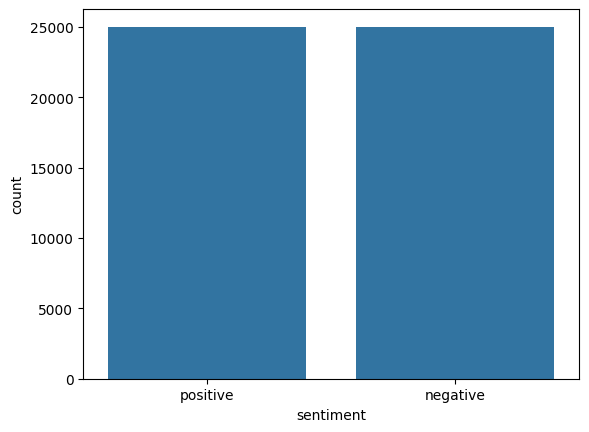

In [8]:
sns.countplot(x = "sentiment", data = data)
plt.show()

In [9]:
data["sentiment"] = data["sentiment"].map({"positive": 1, "negative": 0})

In [10]:
# Remove html words like <br/><br/>

for i,w in enumerate(data["review"]):
    soup = BeautifulSoup(w, "lxml")
    word = soup.get_text(separator = " ")
    data.loc[i, "review"] = word

In [11]:
data.head(1)

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me. The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word. It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away. I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",1


In [12]:
data["review"] = data["review"].str.lower()

In [13]:
data.head(1)

,review,sentiment
0,"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me. the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word. it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away. i would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. forget pretty pictures painted for mainstream audiences, forget charm, forget romance...oz doesn't mess around. the first episode i ever saw struck me as so nasty it was surreal, i couldn't say i was ready for it, but as i watched more, i developed a taste for oz, and got accustomed to the high levels of graphic violence. not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) watching oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",1


In [14]:
unique_words = set()

for w in data["review"]:
    words = w.split()
    unique_words.update(words)

print("Total number of unique words from this dataset is ",len(unique_words))

Total number of unique words from this dataset is  365402


In [15]:
x = data["review"]
y = data["sentiment"]

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.20, random_state = 36)

In [16]:
print(x_train.shape)
print(x_test.shape)

(40000,)
(10000,)


In [17]:
# Tokenize dataset

tokenizer = Tokenizer(num_words = 6000, oov_token = "<OOV")
tokenizer.fit_on_texts(x_train)

x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = 200)
x_test = pad_sequences(x_test, maxlen = 200)

In [18]:
x_train

array([[   0,    0,    0, ..., 2145,  183,  104],
       [   5,    1, 1691, ...,  644,  644,    1],
       [   0,    0,    0, ...,  739,    5,  955],
       ...,
       [   0,    0,    0, ...,    1,  319,  113],
       [   0,    0,    0, ...,  103,   16,   29],
       [   0,    0,    0, ...,   56, 4982,  657]],
      shape=(40000, 200), dtype=int32)

In [19]:
print(x_train.shape)
print(x_test.shape)

(40000, 200)
(10000, 200)


In [20]:
model = Sequential()

model.add(Input(shape = (200,)))
model.add(Embedding(input_dim = 6000, output_dim = 128))

model.add(LSTM(128))
model.add(Dropout(0.50))

model.add(Dense(1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", metrics = ["accuracy"], optimizer = Adam())
model.summary()

I0000 00:00:1762942306.101932     321 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3537 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │       768,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 899,713 (3.43 MB)

 Trainable params: 899,713 (3.43 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
cb = EarlyStopping(monitor = "val_loss", patience = 6, restore_best_weights = True)
model_training_info = model.fit(x_train,y_train, batch_size = 32, epochs = 20, validation_data = [x_test,y_test], callbacks = cb)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.8099 - loss: 0.4153 - val_accuracy: 0.8643 - val_loss: 0.3318
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.8848 - loss: 0.2823 - val_accuracy: 0.8788 - val_loss: 0.2850
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9148 - loss: 0.2211 - val_accuracy: 0.8838 - val_loss: 0.2822
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9255 - loss: 0.1942 - val_accuracy: 0.8820 - val_loss: 0.2962
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9462 - loss: 0.1454 - val_accuracy: 0.8896 - val_loss: 0.2980
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9576 - loss: 0.1196 - val_accuracy: 0.8843 - val_loss: 0.3485
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9669 - loss: 0.0960 - val_accuracy: 0.8826 - val_loss: 0.3774
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9735 -

In [36]:
training_hist = model_training_info.history

In [37]:
training_hist.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

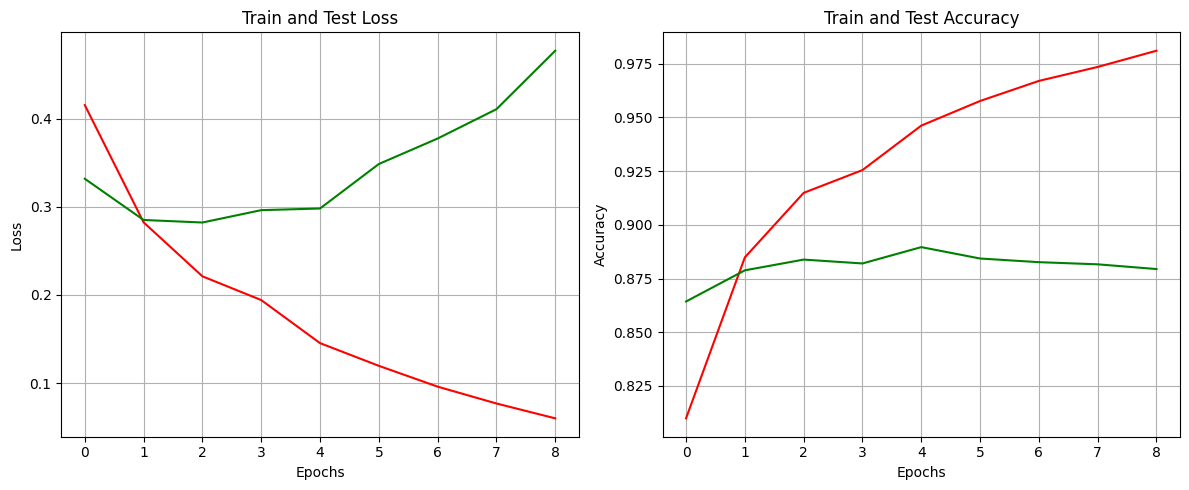

In [40]:
plt.figure(figsize = (12, 5))

plt.subplot(1,2,1)
plt.title("Train and Test Loss")
plt.plot(training_hist["loss"], color = "red", label = "Train Loss")
plt.plot(training_hist["val_loss"], color = "green", label = "Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()

plt.subplot(1,2,2)
plt.title("Train and Test Accuracy")
plt.plot(training_hist["accuracy"], color = "red", label = "Train Accuracy")
plt.plot(training_hist["val_accuracy"], color = "green", label = "Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()

plt.tight_layout()
plt.show()

In [41]:
print(model.evaluate(x_train,y_train))
print(model.evaluate(x_test,y_test))

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9455 - loss: 0.1605
[0.1604996621608734, 0.9455000162124634]
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8838 - loss: 0.2822
[0.2821631133556366, 0.8838000297546387]


In [45]:
y_pred = model.predict(x_test)

y_pred = (y_pred > 0.50).astype(int)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [46]:
y_pred

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]], shape=(10000, 1))

In [52]:
report = classification_report(y_test,y_pred)
matrix = confusion_matrix(y_test,y_pred)

print("Classification Report :", report)

Classification Report :               precision    recall  f1-score   support

           0       0.88      0.89      0.88      4988
           1       0.89      0.88      0.88      5012

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



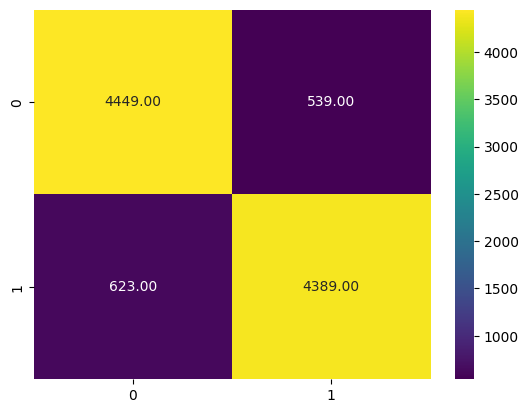

In [53]:
sns.heatmap(matrix, annot = True, fmt = ".2f", cmap = "viridis")
plt.show()

In [54]:
model.save("/home/sonuts/IMDB project dl/model.keras")

In [22]:
with open("/home/sonuts/IMDB project dl/tokenizer.pkl", "wb") as file:
    pickle.dump(tokenizer, file)